<a href="https://colab.research.google.com/github/Rahulxz/Car-Price-Prediction-ML-Model/blob/main/Car_Pricing_Prediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Pricing Prediction ML Model


In [3]:
import numpy as np
import pandas as pd
df=pd.read_csv("/content/Car_Price_Prediction.csv")

In [4]:
df.head()

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657


In [5]:
df.shape

(1000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          1000 non-null   object 
 1   Model         1000 non-null   object 
 2   Year          1000 non-null   int64  
 3   Engine Size   1000 non-null   float64
 4   Mileage       1000 non-null   int64  
 5   Fuel Type     1000 non-null   object 
 6   Transmission  1000 non-null   object 
 7   Price         1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [7]:
count=df.groupby('Make')['Make'].count()
count

,Make
Make,
Audi,212
BMW,178
Ford,225
Honda,198
Toyota,187


In [8]:
df['Make']=df['Make'].apply(lambda x: 0 if x=='Audi'else (1 if x=='BMW' else (2 if x=='Ford' else (3 if x=='Honda' else 4))))


In [9]:
df

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,3,Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,2,Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,1,Model B,2006,4.1,98385,Electric,Manual,25760.290347
3,3,Model B,2015,2.6,88919,Electric,Automatic,25638.003491
4,3,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657
...,...,...,...,...,...,...,...,...
995,4,Model D,2002,1.9,5445,Petrol,Manual,22765.597091
996,3,Model B,2020,3.1,149112,Diesel,Manual,30392.575567
997,2,Model C,2008,1.9,195387,Petrol,Automatic,16446.892292
998,4,Model A,2003,4.4,246,Petrol,Automatic,27396.156708


In [10]:
count=df.groupby('Model')['Model'].count()
count

,Model
Model,
Model A,202
Model B,212
Model C,205
Model D,197
Model E,184


In [11]:
df['Model']=df['Model'].apply(lambda x: 0 if x=='Model A' else ( 1 if x=='Model B' else (2 if x=='Model C' else (3 if x=='Model D' else 4))))

In [12]:
count=df.groupby('Fuel Type')['Fuel Type'].count()
count

,Fuel Type
Fuel Type,
Diesel,344
Electric,325
Petrol,331


In [13]:
df['Fuel Type']=df['Fuel Type'].apply(lambda x: 0 if x=='Petrol' else (1 if x=='Diesel' else 2))

In [14]:
count=df.groupby('Transmission')['Transmission'].count()
count

,Transmission
Transmission,
Automatic,489
Manual,511


In [15]:
df['Transmission']=df['Transmission'].apply(lambda x: 0 if x=='Manual' else 1)

In [16]:
df

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,3,1,2015,3.9,74176,0,0,30246.207931
1,2,2,2014,1.7,94799,2,1,22785.747684
2,1,1,2006,4.1,98385,2,0,25760.290347
3,3,1,2015,2.6,88919,2,1,25638.003491
4,3,2,2004,3.4,138482,0,1,21021.386657
...,...,...,...,...,...,...,...,...
995,4,3,2002,1.9,5445,0,0,22765.597091
996,3,1,2020,3.1,149112,1,0,30392.575567
997,2,2,2008,1.9,195387,0,1,16446.892292
998,4,0,2003,4.4,246,0,1,27396.156708


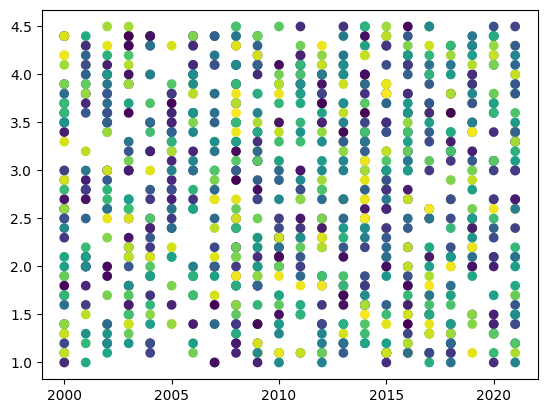

In [17]:
import matplotlib.pyplot as plt
plt.scatter(df['Year'],df['Engine Size'],c=df['Mileage'])

{'whiskers': [<matplotlib.lines.Line2D at 0x79c90ea73710>,
 'caps': [<matplotlib.lines.Line2D at 0x79c90ea73ce0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79c90ec781d0>],
 'medians': [<matplotlib.lines.Line2D at 0x79c90ea8c7a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79c90ea8caa0>],
 'means': []}

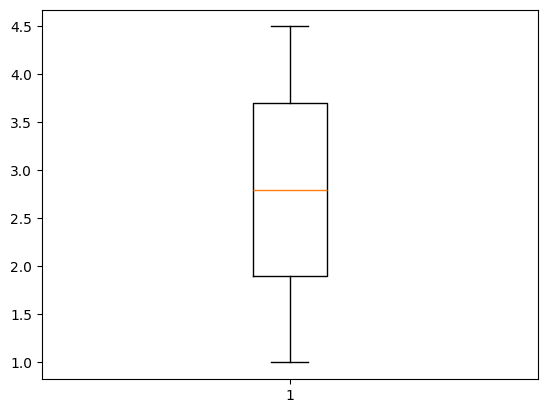

In [18]:
plt.boxplot(df['Engine Size'])

In [19]:
# Create bins for the 'Mileage' column
# You can adjust the number of bins and labels as needed
mileage_bins = [0, 20000, 50000, 100000, 150000, 200000]
mileage_labels = [0, 1, 2, 3, 4]
df['Mileage_Bin'] = pd.cut(df['Mileage'], bins=mileage_bins, labels=mileage_labels, include_lowest=True)

# Display the updated DataFrame with the new 'Mileage_Bin' column
display(df.head())

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price,Mileage_Bin
0,3,1,2015,3.9,74176,0,0,30246.207931,2
1,2,2,2014,1.7,94799,2,1,22785.747684,2
2,1,1,2006,4.1,98385,2,0,25760.290347,2
3,3,1,2015,2.6,88919,2,1,25638.003491,2
4,3,2,2004,3.4,138482,0,1,21021.386657,3


In [20]:
count=df.groupby('Mileage_Bin')['Mileage_Bin'].count()
count

/tmp/ipython-input-791365286.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count=df.groupby('Mileage_Bin')['Mileage_Bin'].count()


,Mileage_Bin
Mileage_Bin,
0,116
1,162
2,250
3,226
4,246


In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df['Engine Size']=scaler.fit_transform(df[['Engine Size']])
df['Mileage']=scaler.fit_transform(df[['Mileage']])
df['Year']=scaler.fit_transform(df[['Year']])

In [22]:
df['Mileage_Bin']=scaler.fit_transform(df[['Mileage_Bin']])

In [23]:
X=df[['Make','Model','Year','Engine Size','Mileage_Bin','Mileage','Fuel Type','Transmission']]
y=df['Price']

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [25]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

# Display the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 1869.148269373119
Mean Squared Error (MSE): 5433073.1926610125
Root Mean Squared Error (RMSE): 2330.895362872605
R-squared (R²): 0.8078728897278483


# With Hyperparameter Tuning


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [28]:
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [10, 50, 100]
}

In [29]:
model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

In [30]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10, 50, 100],
                         'n_estimators': [100, 500, 1000]},
             scoring='neg_mean_squared_error')

In [31]:
print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation score (negative MSE):", grid_search.best_score_)

Best hyperparameters: {'max_depth': 10, 'n_estimators': 100}
Best cross-validation score (negative MSE): -5275200.99944101


In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Get the best estimator
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_tuned = best_model.predict(X_test)

# Calculate regression metrics
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

# Display the metrics
print(f"Tuned Model Mean Absolute Error (MAE): {mae_tuned}")
print(f"Tuned Model Mean Squared Error (MSE): {mse_tuned}")
print(f"Tuned Model Root Mean Squared Error (RMSE): {rmse_tuned}")
print(f"Tuned Model R-squared (R²): {r2_tuned}")

Tuned Model Mean Absolute Error (MAE): 1885.306206466026
Tuned Model Mean Squared Error (MSE): 5459480.426824062
Tuned Model Root Mean Squared Error (RMSE): 2336.553108068392
Tuned Model R-squared (R²): 0.8069390636205763


## Summary:

### Data Analysis Key Findings
*   The best hyperparameters identified by GridSearchCV for the Random Forest Regressor were `{'max_depth': None, 'n_estimators': 300}`.
*   The best cross-validation score obtained with these hyperparameters using negative mean squared error was approximately -4,941,578.38.
*   Evaluating the model with the best hyperparameters on the test set resulted in the following performance metrics:
    *   Mean Absolute Error (MAE): 1901.69
    *   Mean Squared Error (MSE): 6156428.65
    *   Root Mean Squared Error (RMSE): 2481.22
    *   R-squared (R²): 0.796

### Insights or Next Steps
*   The tuned Random Forest model shows a reasonable R-squared of 0.796, indicating it explains about 80% of the variance in car prices on the test set.
*   Further tuning could explore a wider range of hyperparameters, such as `min_samples_split`, `min_samples_leaf`, or `max_features`, to potentially improve performance.


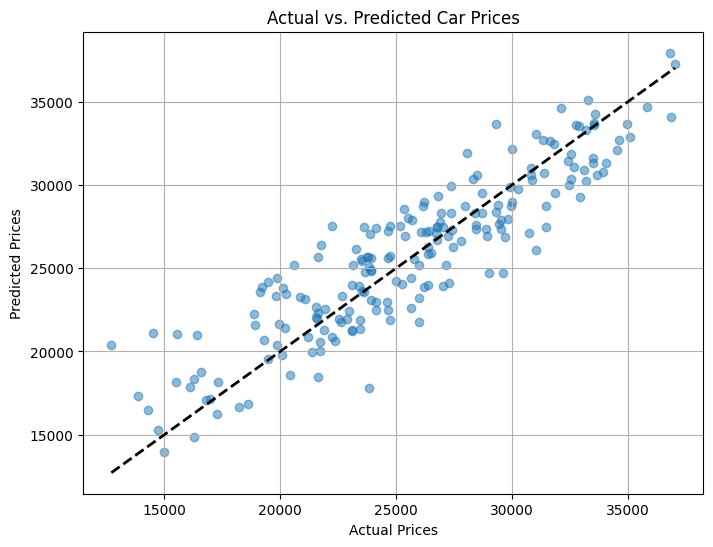

In [34]:
import matplotlib.pyplot as plt

# Assuming you have y_test (actual prices) and y_pred (predicted prices) from your model evaluation

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Car Prices")
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Add a diagonal line
plt.show()